# KMeans

Here we study if the pixel values are enough to classify our dataset by emotions.

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
CSV_PATH = '../csv/'
IMG_PATH = '../img/'

We choose a dataset with picture's size equals to (64,64)

In [3]:
pictures = pd.read_csv(CSV_PATH + 'balanced_300_64.csv', header=None).to_numpy()
emotions = pd.read_csv(CSV_PATH + 'labels_300.csv', header=None).to_numpy().flatten()

In [4]:
pictures[:4]

array([[ 10.,  21.,  30., ...,  53.,  56.,  67.],
       [ 92.,  93.,  93., ..., 107., 118., 126.],
       [ 74.,  67.,  66., ...,  92.,  81.,  78.],
       [ 28.,  20.,  23., ..., 180., 179., 185.]])

In [5]:
emotions[:4]

array(['neutral', 'neutral', 'neutral', 'neutral'], dtype=object)

**Apply KMeans algorithm on our picture dataset**

In [6]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(pictures)

In [7]:
results={ clst:{label:0 for label in emotions} for clst in range(8)}
for idx, cluster in enumerate(kmeans.labels_):
    results[cluster][emotions[idx]]+=1

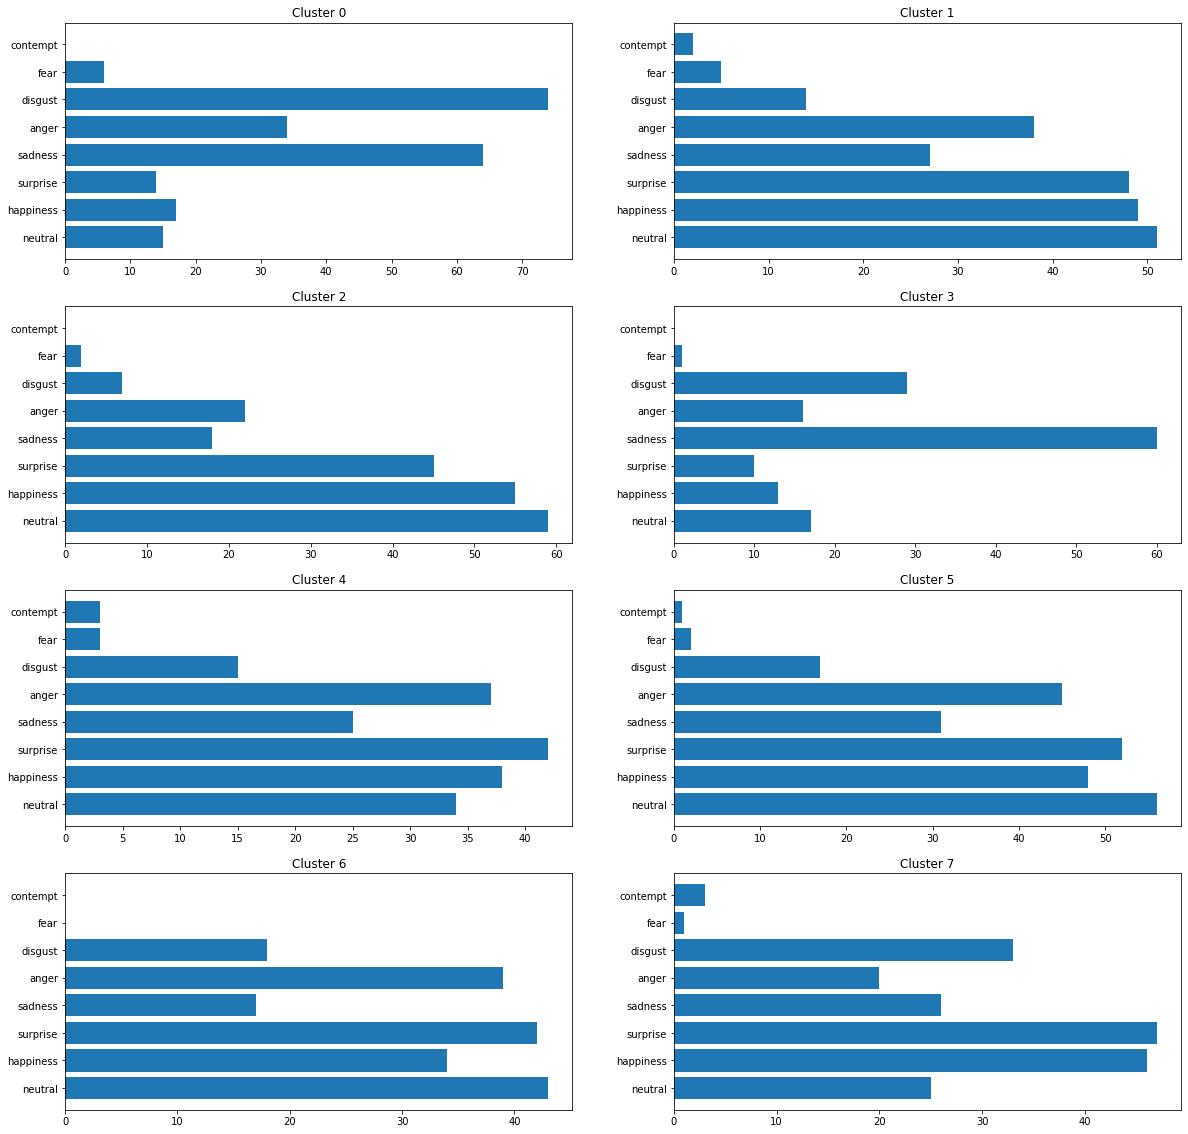

In [8]:
plt.rcParams["figure.figsize"] = (20,20)
for cluster in range(8):

    D = results[cluster]
    plt.subplot(4, 2, cluster+1)
    plt.barh(range(len(D)), list(D.values()), align='center')
    plt.yticks(range(len(D)), list(D.keys()))
    plt.title('Cluster ' + str(cluster))

plt.show()

### Results

As we can see above, the cluster doesn't seems to separate the pictures that have the same label. So we can't use only the pixel values to classify our pictures.